In [1]:
import skimage.morphology
import skimage.io as io
import numpy as np
import os
import pandas as pd
import seaborn as sns
import shutil

In [2]:
in_dir_path = r"D:\nuclear_seg\root_HT\Fields"

In [3]:
num_nuclei_dict = {'ROI': [], 'num_nuclei': []}
for file in os.listdir(in_dir_path):
    fpath = os.path.join(in_dir_path, file, 'ground_truth', 'gr_tr.tiff')

    gr_tr_mask = io.imread(fpath)
    area = gr_tr_mask.shape[0] * gr_tr_mask.shape[1]
    gr_tr_mask_relabeled = skimage.morphology.label(gr_tr_mask)
    num_nuclei = len(np.unique(gr_tr_mask_relabeled))
    num_nuclei_dict['ROI'].append(file)
    num_nuclei_dict['num_nuclei'].append(num_nuclei/area)

In [4]:
num_nuclei_df = pd.DataFrame(num_nuclei_dict)

In [5]:
num_nuclei_df

,ROI,num_nuclei
0,Bph2_45174_14597_160_246,0.000626
1,Bph2_45174_14597_2032_2032,0.003021
2,Bph2_45174_14597_2492_682,0.002792
3,Bph2_45174_14597_3625_2420,0.001770
4,P01_10001_54032_15278_550_400,0.002587
5,P01_10002_41478_16613_300_50,0.002581
6,P01_10003_59622_10626_650_100,0.002594
7,P01_10004_45412_13528_300_300,0.005500
8,P01_10005_54191_8632_600_100,0.001488
9,P01_10007_43705_10821_700_100,0.001500


In [6]:
num_nuclei_df['num_nuclei'].sum()

0.17889130859375

<Axes: xlabel='num_nuclei', ylabel='Count'>

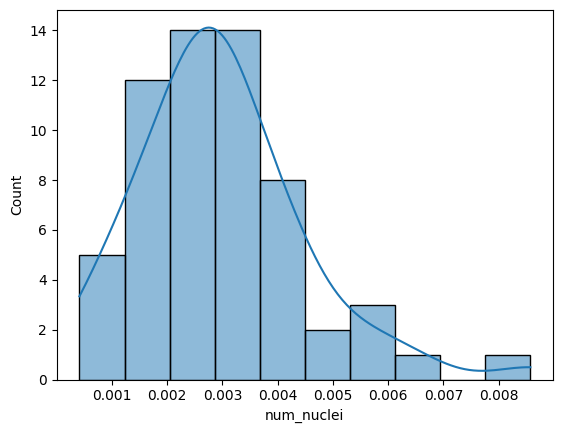

In [7]:
sns.histplot(num_nuclei_df['num_nuclei'], kde=True)

Separating by median

In [8]:
median = num_nuclei_df['num_nuclei'].median()
median

0.00278472900390625

In [9]:
less_median_files = num_nuclei_df['ROI'][num_nuclei_df['num_nuclei']<median]

In [10]:
more_median_files = num_nuclei_df['ROI'][num_nuclei_df['num_nuclei']>=median]

In [11]:
len(less_median_files)

30

In [12]:
len(less_median_files) + len(more_median_files)

60

In [13]:
lessmedian_dir_path = r"D:\nuclear_seg\root_lessmedian\Fields"
moremedian_dir_path = r"D:\nuclear_seg\root_moremedian\Fields"

In [14]:
for file in less_median_files:
    shutil.copytree(os.path.join(in_dir_path, file), os.path.join(lessmedian_dir_path, file))

In [15]:
for file in more_median_files:
    shutil.copytree(os.path.join(in_dir_path, file), os.path.join(moremedian_dir_path, file))

Separating by upper quartile

In [8]:
median = num_nuclei_df['num_nuclei'].quantile(0.75)
median

0.003684375

In [9]:
less_median_files = num_nuclei_df['ROI'][num_nuclei_df['num_nuclei']<median]

In [10]:
more_median_files = num_nuclei_df['ROI'][num_nuclei_df['num_nuclei']>=median]

In [11]:
len(less_median_files)

45

In [12]:
len(less_median_files) + len(more_median_files)

60

In [13]:
lessmedian_dir_path = r"D:\nuclear_seg\root_lessUQ\Fields"
moremedian_dir_path = r"D:\nuclear_seg\root_moreUQ\Fields"

In [14]:
for file in less_median_files:
    shutil.copytree(os.path.join(in_dir_path, file), os.path.join(lessmedian_dir_path, file))

In [15]:
for file in more_median_files:
    shutil.copytree(os.path.join(in_dir_path, file), os.path.join(moremedian_dir_path, file))

Separating by lower quartile

In [8]:
median = num_nuclei_df['num_nuclei'].quantile(0.25)
median

0.002004412841796875

In [9]:
less_median_files = num_nuclei_df['ROI'][num_nuclei_df['num_nuclei']<median]

In [10]:
more_median_files = num_nuclei_df['ROI'][num_nuclei_df['num_nuclei']>=median]

In [11]:
len(less_median_files)

15

In [12]:
len(less_median_files) + len(more_median_files)

60

In [13]:
lessmedian_dir_path = r"D:\nuclear_seg\root_lessLQ\Fields"
moremedian_dir_path = r"D:\nuclear_seg\root_moreLQ\Fields"

In [14]:
for file in less_median_files:
    shutil.copytree(os.path.join(in_dir_path, file), os.path.join(lessmedian_dir_path, file))

In [15]:
for file in more_median_files:
    shutil.copytree(os.path.join(in_dir_path, file), os.path.join(moremedian_dir_path, file))